# 🛒 DMART Retail Dataset 🛒 - Exploratory Data Analysis (EDA) Case Study
---------------------

* To perform an in-depth Exploratory Data Analysis on synthetic DMART retail data to uncover customer purchaces behaviour , sales performance , and business insights that can support decision - making. 

In [1]:
# IMPORTING LIBRARIES TO ANALYSE THE DATASET 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno

# 1. Data Understanding 
__________________

In [2]:
# importing dataset using read csv in pandas 
dataset = pd.read_csv(r"C:\Users\karth\Desktop\DMART_dataset.csv")
dataset.head(2)

,Transaction_ID,Store_ID,Product_Category,Sub_Category,Customer_Age,Customer_Gender,Purchase_Amount,Discount_Applied,Payment_Mode,Rating,Quantity,Loyalty_Card,Region,Weekday,Store_Type
0,b9e59f16-38a0-44ff-a941-a105a196b664,D-914,Household,A,31.0,Male,936.67,41.27,Card,4,1,Yes,East,Mon,Express
1,2864f362-dda7-44cd-a7ac-b29a896e7b7e,NaN,Pharmacy,C,52.0,Male,869.96,NaN,Card,1,2,No,West,Thu,Hypermarket


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214000 entries, 0 to 213999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    214000 non-null  object 
 1   Store_ID          192600 non-null  object 
 2   Product_Category  214000 non-null  object 
 3   Sub_Category      192600 non-null  object 
 4   Customer_Age      192600 non-null  float64
 5   Customer_Gender   214000 non-null  object 
 6   Purchase_Amount   214000 non-null  float64
 7   Discount_Applied  192600 non-null  float64
 8   Payment_Mode      214000 non-null  object 
 9   Rating            214000 non-null  int64  
 10  Quantity          214000 non-null  int64  
 11  Loyalty_Card      214000 non-null  object 
 12  Region            214000 non-null  object 
 13  Weekday           214000 non-null  object 
 14  Store_Type        192600 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 24.5+ MB


In [4]:
# The shape of the dataset 
dataset.shape

(214000, 15)

In [5]:
# Total columns of the dataset 
dataset.columns

Index(['Transaction_ID', 'Store_ID', 'Product_Category', 'Sub_Category',
       'Customer_Age', 'Customer_Gender', 'Purchase_Amount',
       'Discount_Applied', 'Payment_Mode', 'Rating', 'Quantity',
       'Loyalty_Card', 'Region', 'Weekday', 'Store_Type'],
      dtype='object')

In [6]:
# Check  the Null values in dataset 
dataset.isnull().any()

Transaction_ID      False
Store_ID             True
Product_Category    False
Sub_Category         True
Customer_Age         True
Customer_Gender     False
Purchase_Amount     False
Discount_Applied     True
Payment_Mode        False
Rating              False
Quantity            False
Loyalty_Card        False
Region              False
Weekday             False
Store_Type           True
dtype: bool

In [7]:
dataset.isnull().sum()

Transaction_ID          0
Store_ID            21400
Product_Category        0
Sub_Category        21400
Customer_Age        21400
Customer_Gender         0
Purchase_Amount         0
Discount_Applied    21400
Payment_Mode            0
Rating                  0
Quantity                0
Loyalty_Card            0
Region                  0
Weekday                 0
Store_Type          21400
dtype: int64

In [8]:
dataset.head(1)

,Transaction_ID,Store_ID,Product_Category,Sub_Category,Customer_Age,Customer_Gender,Purchase_Amount,Discount_Applied,Payment_Mode,Rating,Quantity,Loyalty_Card,Region,Weekday,Store_Type
0,b9e59f16-38a0-44ff-a941-a105a196b664,D-914,Household,A,31.0,Male,936.67,41.27,Card,4,1,Yes,East,Mon,Express


In [9]:
for col in dataset.columns:
    print(f"column: {col}")
    print(f"Data Type : {dataset[col].dtype}")
    print("-" * 30)

column: Transaction_ID
Data Type : object
------------------------------
column: Store_ID
Data Type : object
------------------------------
column: Product_Category
Data Type : object
------------------------------
column: Sub_Category
Data Type : object
------------------------------
column: Customer_Age
Data Type : float64
------------------------------
column: Customer_Gender
Data Type : object
------------------------------
column: Purchase_Amount
Data Type : float64
------------------------------
column: Discount_Applied
Data Type : float64
------------------------------
column: Payment_Mode
Data Type : object
------------------------------
column: Rating
Data Type : int64
------------------------------
column: Quantity
Data Type : int64
------------------------------
column: Loyalty_Card
Data Type : object
------------------------------
column: Region
Data Type : object
------------------------------
column: Weekday
Data Type : object
------------------------------
column: Store_

<Axes: >

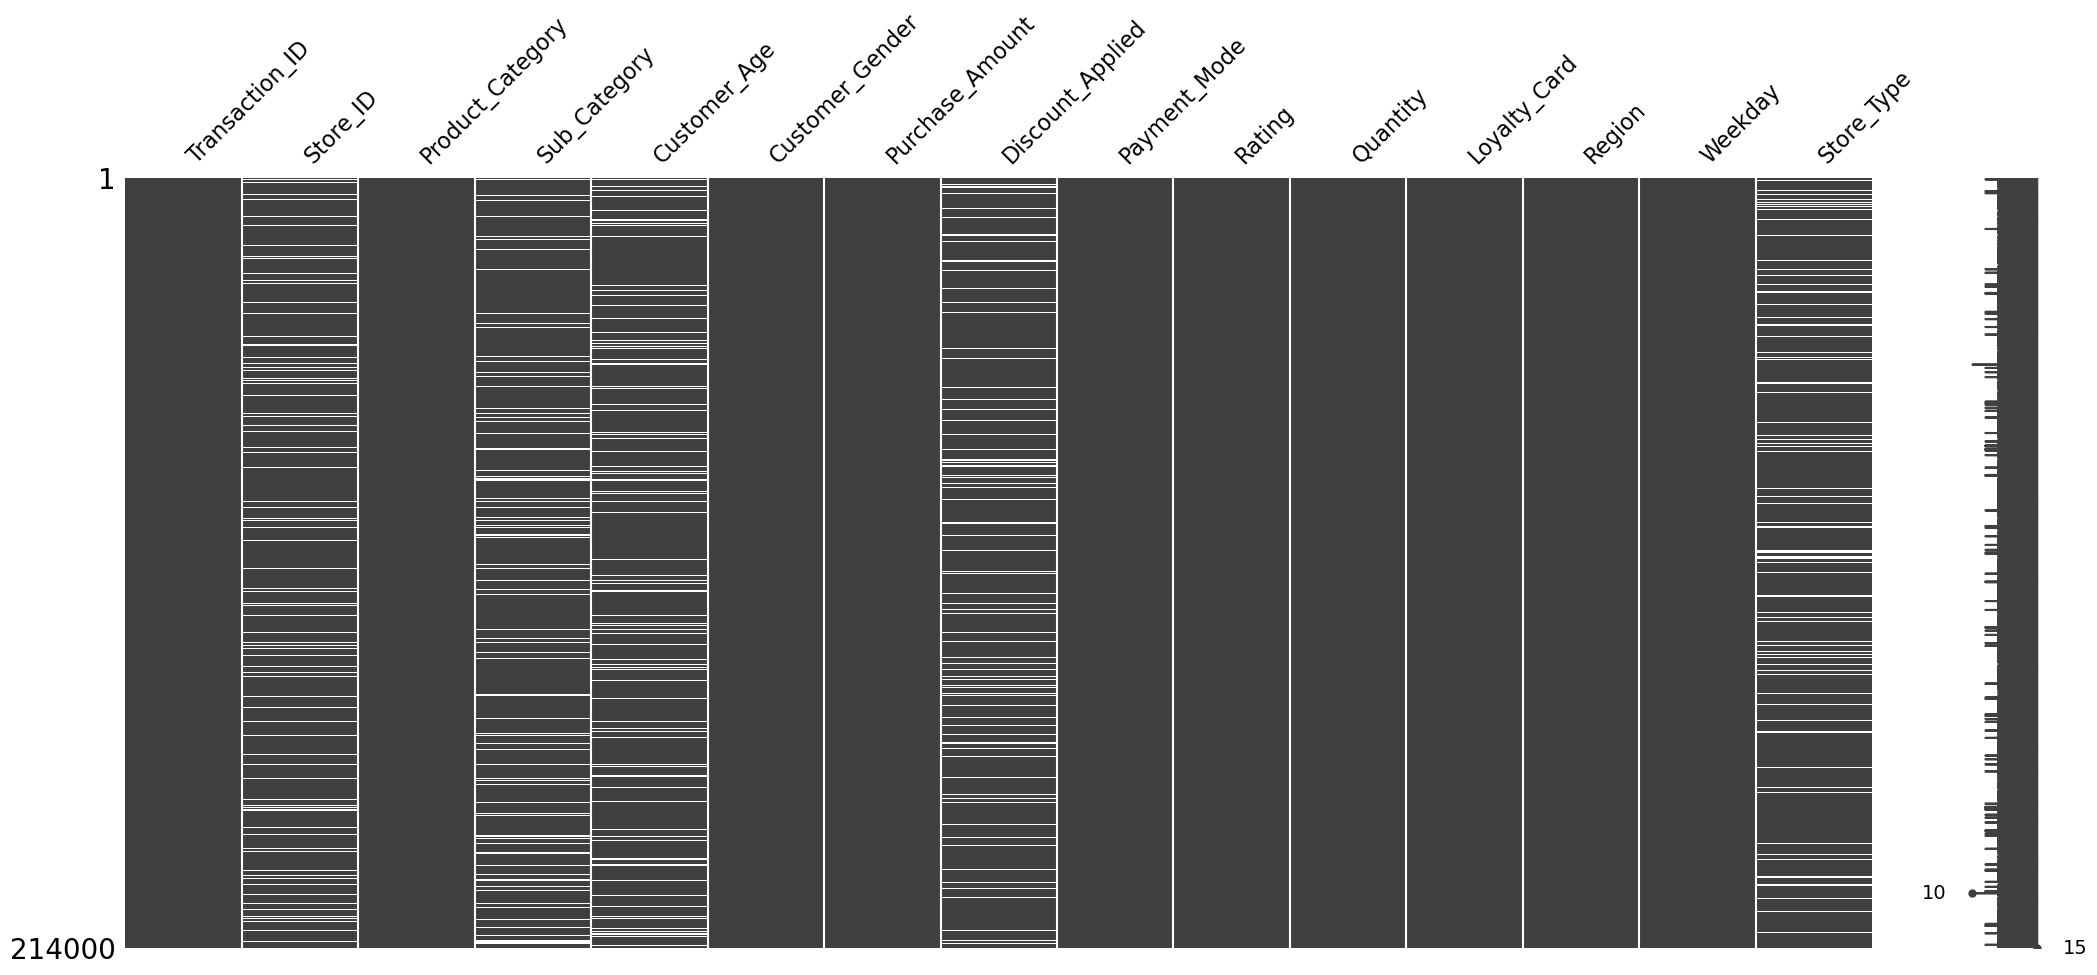

In [10]:
msno.matrix(dataset)

# INSIGHTS
* Total Rows present - 214000
* Total Columns present - 15

### Numerical Columns 
* Customer_Age - `Null Values `
* Purchase_Amount
* Discount_Applied - `Null Values`
### Descrete Numerical Columns 
* Rating
* Quantity 
### Categorical Columns 
* Transaction_ID
* Store_ID  - `Null Values` 
* Product_Category
* Sub_Category - `Null Values` 
* Customer_Gender 
* Payment_Mode
* Loyalty_Card
* Region
* Weekday
* Store_Type - `Null Values`

### Missing values 

* Present in ~ 10% of values for 5 Columns  

# 2.Data Cleaning
______

## Handling Duplicates
* Checking dupplicates in `Transaction_ID` column. 

In [11]:
duplicates = dataset.duplicated()
print(duplicates.value_counts())   # Count of duplicates vs non - duplicates

False    208667
True       5333
Name: count, dtype: int64


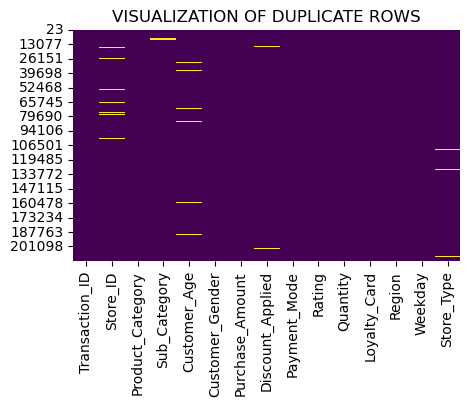

In [9]:
# Identify duplicates (keeing all occurrences)
duplicates = dataset[dataset.duplicated(keep = False)]

# Create heatmap to identify the missing values present in columns 
plt.figure(figsize= (5,3))
sns.heatmap(duplicates.isnull(),cbar= False,cmap= 'viridis')
plt.title('VISUALIZATION OF DUPLICATE ROWS')
plt.show()

#### Removing Duplicates

In [10]:
# Dataset Before Removing duplicates
dataset.shape

(214000, 15)

In [11]:
# This keeps the first occurence of each duplicate rows
updated_dataset = dataset.drop_duplicates()

In [12]:
# Dataset After removing duplicates
updated_dataset.shape

(208667, 15)

## Missing Values

In [13]:
# Dataset Before Filling null values 
updated_dataset.isnull().sum()/len(dataset)*100

Transaction_ID      0.000000
Store_ID            9.959346
Product_Category    0.000000
Sub_Category        9.967757
Customer_Age        9.965888
Customer_Gender     0.000000
Purchase_Amount     0.000000
Discount_Applied    9.968224
Payment_Mode        0.000000
Rating              0.000000
Quantity            0.000000
Loyalty_Card        0.000000
Region              0.000000
Weekday             0.000000
Store_Type          9.969626
dtype: float64

* After removing duplicates from the `dataset` , In `non_duplicated_dataset` there is 5 columns have null values less than 9% . So i want to fill the null values .

* `Numerical - Columns` : Imputed with mean.

* `Descrete Numerical - Columns` : Imputed with mean or mode.

* `Categorical Columns` : Imputed with mode or marked as 'Unknown'

###  > Null - Numerical columns 
* Customer_Age 
* Discount_Applied

- Filling all `numerical column` with mean.

### > Mean Values 
* I can fill missing values in all numerical columns with their respective mean values using pandas.
* Basic Method (Using`fillna()` with `mean()`)

In [14]:
# Select only numerical columns 
num_cols = updated_dataset.select_dtypes(include = ['int64','float64']).columns

# Fill each numerical column with its mean 
for col in num_cols:
    updated_dataset[col] = updated_dataset[col].fillna(updated_dataset[col].mean()) 

C:\Users\karth\AppData\Local\Temp\ipykernel_10044\665119446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset[col] = updated_dataset[col].fillna(updated_dataset[col].mean())


### > Null - Categorical Columns
* Store_ID
* Sub_Category
* Store_Type

* Filling all `Categorical Columns` with mode.

### > Mode Values (Most Frequent Value)
* Since categorical columns don't have mathematical means (which are only for numerical data), I fill them with the `mode` (most frequent value).

In [15]:
# select only categorical columns 
cat_cols = updated_dataset.select_dtypes(include = ['object','category']).columns

# Fill each categorical column with mode
for col in cat_cols:
    updated_dataset[col] = updated_dataset[col].fillna(updated_dataset[col].mode()[0])

# [0] takes first mode if multiple exist

C:\Users\karth\AppData\Local\Temp\ipykernel_10044\3525569134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_dataset[col] = updated_dataset[col].fillna(updated_dataset[col].mode()[0])


## > Fill null values 

In [16]:
# Dataset After  Filling null values 
updated_dataset.isnull().sum()

Transaction_ID      0
Store_ID            0
Product_Category    0
Sub_Category        0
Customer_Age        0
Customer_Gender     0
Purchase_Amount     0
Discount_Applied    0
Payment_Mode        0
Rating              0
Quantity            0
Loyalty_Card        0
Region              0
Weekday             0
Store_Type          0
dtype: int64

In [17]:
updated_dataset.head(1)

,Transaction_ID,Store_ID,Product_Category,Sub_Category,Customer_Age,Customer_Gender,Purchase_Amount,Discount_Applied,Payment_Mode,Rating,Quantity,Loyalty_Card,Region,Weekday,Store_Type
0,b9e59f16-38a0-44ff-a941-a105a196b664,D-914,Household,A,31.0,Male,936.67,41.27,Card,4,1,Yes,East,Mon,Express


# Detecting Outliers in Dataset 

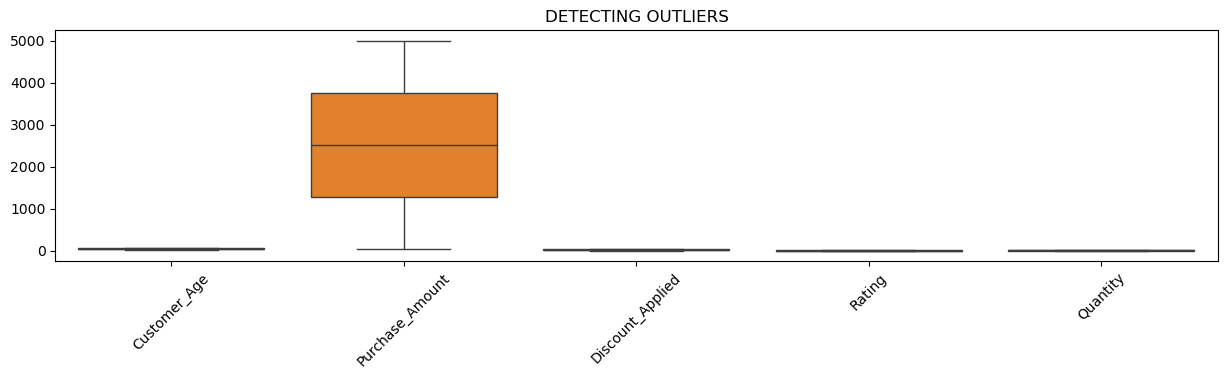

In [18]:
plt.figure(figsize =(15,3))
sns.boxplot(data = updated_dataset.select_dtypes(include = "number"))
plt.title("DETECTING OUTLIERS")
plt.xticks(rotation =45)
plt.show()

# 3.Data Visualization & Analysis
________________

## I . Univariate Analysis
* Univariate analysis focuses on analyzing a single variable at a time.

In [19]:
updated_dataset.head(1)

,Transaction_ID,Store_ID,Product_Category,Sub_Category,Customer_Age,Customer_Gender,Purchase_Amount,Discount_Applied,Payment_Mode,Rating,Quantity,Loyalty_Card,Region,Weekday,Store_Type
0,b9e59f16-38a0-44ff-a941-a105a196b664,D-914,Household,A,31.0,Male,936.67,41.27,Card,4,1,Yes,East,Mon,Express


### Product_Category - Categorical Data 

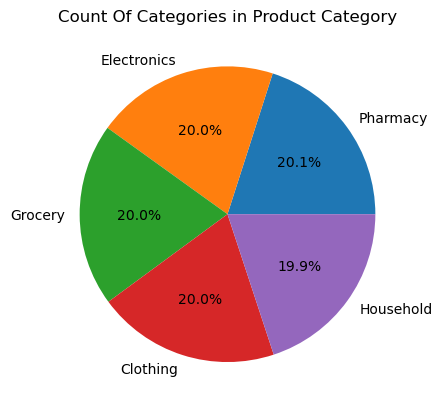

In [20]:
# Pie Chart 
updated_dataset['Product_Category'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Count Of Categories in Product Category')
plt.ylabel('')
plt.show()

* The product category column have 5 different groups , they are
  1. Pharmacy - 20.1%
  2. Electronics - 20.0%
  3. Grocery - 20.0%
  4. Clothing - 20.0%
  5. Household - 19.9%

*  `Grocery` , `Clothing` and `Electronics` are most frequent.



## INSIGHTS
___________________________
#### 1. Almost Perfect Uniformity
* All five categories have `almost equal representation`, each around `20%`.
* This suggests a `balanced dataset` with `no over-representation or bias` toward any one product category.
* Useful for training models (like classifications) without skew.

#### 2. Pharmacy Slightly Higher
* `Pharmacy leads` by a small margin (20.1%).
* This could be:
  * Due to slightly higher demand for health-related products.
  * Or sampling noise if randomly generated.

#### 3. No Dominant Category
* No category dominates purchases — this implies the business or dataset aims to cover a `broad range of consumer needs` across all sectors.

#### 4. Good for Category Comparison
* Since distribution is even, comparisons between categories (e.g., average, discount, revenue, customer segment) can be done `without normalization bias`.
_______________

### Customer_Age - Numerical Data

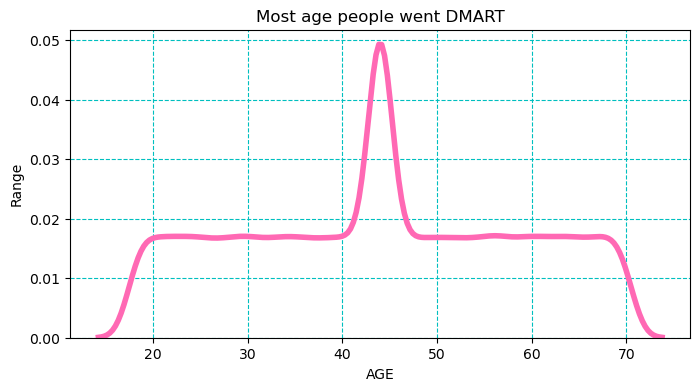

In [21]:
# KDE plot 
plt.figure(figsize=(8,4))
sns.kdeplot(updated_dataset['Customer_Age'],color = 'hotpink',linewidth = '4')
plt.title('Most age people went DMART')
plt.xlabel('AGE')
plt.ylabel('Range')
plt.grid(color = 'c',linestyle = '--')
plt.show()

* Most aged customers between 40 to 50 years

### INSIGHTS
________

#### 1. Peak Age Group : 43 - 45

   * The sharpest peak is around age 44 , indicating this is the `most frequent shopper age group`.
   * Suggests that `middle- aged adults (around early- to - mid 40s)` are the dominant customer segment at DMART .

#### 2. Lower Density in Younger & Older Groups

   * Customers aged `Below ~ 30` and `above ~65` show much lower density (flattened tails).
   * Indicates that:
        * Younger population (possibly students or early professionals) `visit less`.
        * Seniors or retirees also `shop less frequently`.

#### 3. Very Sharp Peak

   * The `density spike is unusually high and narrow`, which may imply :
       * Many rows in the updated dataset have `exactly the same age`.
       * Or a `targeted demographic` (e.g., a marketing list or loyalty card holders in their 40s).

__________

### Purchase Amount - Numerical Data

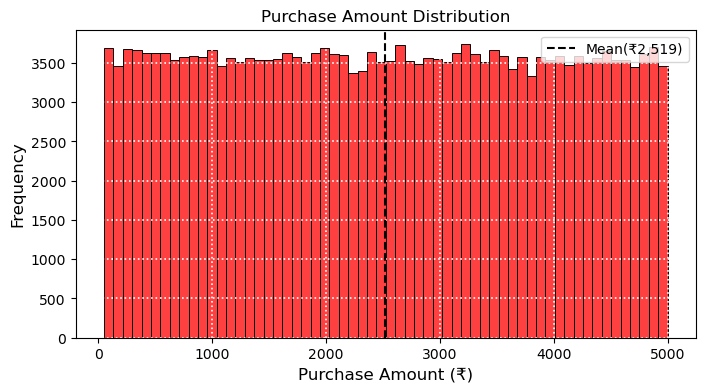

In [22]:
plt.figure(figsize=(8,4))
ax =sns.histplot(data=dataset, x='Purchase_Amount',color = 'red')

# AAdd median line 
mean = dataset['Purchase_Amount'].mean()
ax.axvline(mean,color = 'k',linestyle = '--', label = f'Mean(₹{mean:,.0f})')
          
plt.grid(color = 'w',linestyle = ':',linewidth ='1.2')
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount (₹)',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
plt.legend()
plt.show()

* Skewed right, median ~₹2,520, max ~₹5,000+

### INSIGHTS 
____________


#### 1.Distribution Shape:

* The histogram of **Purchase_Amount** is **relatively uniform**, indicating that purchase amounts are **evenly spread** across the range.

* There's **no strong skewness**, meaning there’s no significant concentration of purchases at the lower or higher end.

#### 2.Mean Purchase Amount:

* The **mean purchase amount is ₹2,519**, which lies **close to the center** of the distribution. This suggests a **balanced dataset** without extreme outliers skewing the average.

* A vertical dashed line is added at the mean to highlight this.

#### 3.Range of Purchase Amounts:

* The purchase amounts range from **just above ₹0 to ₹5,000**.

* The frequency of purchases remains fairly consistent across all bins, each holding roughly **3,500 to 3,700 records**, showing **uniform customer spending behavior**.

#### 4.Business Implications:

* The uniformity implies **predictable customer spending patterns**, which is helpful for inventory and pricing strategies.

* The central tendency (₹2,519) can be used for **segmenting customers**: e.g., below average (budget shoppers), average (regular customers), and above average (premium shoppers).

### Discount_Applied - Numerical Data

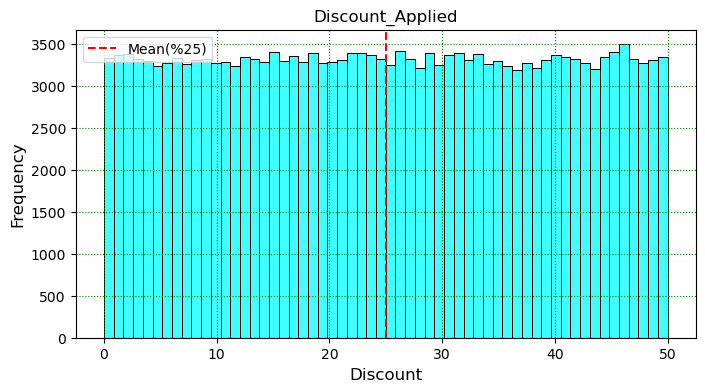

In [23]:
# Hist plot 
plt.figure(figsize=(8,4))
ax =sns.histplot(data=dataset, x='Discount_Applied',color = 'cyan')

# AAdd mean line 
mean = dataset['Discount_Applied'].mean()
ax.axvline(mean,color = 'r',linestyle = '--', label = f'Mean(%{mean:,.0f})')
          
plt.grid(color = 'g',linestyle = ':')
plt.title('Discount_Applied')
plt.xlabel('Discount',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
plt.legend()
plt.show()

* Most discounts fall within 0–25%

### INSIGHTS 
_________________

#### 1. Near - Uniform Distribution 
* The distribution of discounts is `fairly uniform ` from 0% to 50%.
* No strong peak at any particular discount value - sugggesting:
     * Discounts are `randomly or evenly spread`.
     * Possibly synthetic or simulation data designed to avoid bias.

#### 2. Mean Discount = 25%
* The red dashed line shows that `average discount applied is 25% `, which is the `midpoint of the 0 - 50% range`.
* Reinforce the idea of `even discount spread`.

#### 3. No Skewness 
* The histogram is `symmetrical` , with  a balanced number of transactions across all discount ranges.
* Indicates there is `no preference for low or high discounts` in the data .

#### 4. Good for Fair Analysis
* Since discount values are evenly distributed :
     * Easy to compare how discounts affect other factors (e.g., purchase amount , customer segments).
     * `No need for normalization or resampling` during analysis.

# II . Bivartiate - Analysis
*  Bivariate Analysis is a statistical method used to explore the relationship between two variables.It helps you understand how one variable is associated with another.

## Discount_Applied vs Purchase_Amount

* Num vs Num 

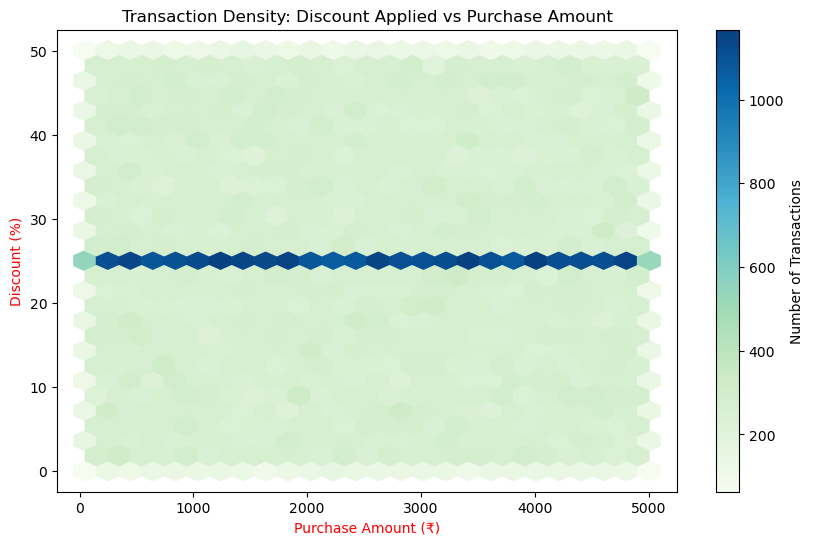

In [24]:
plt.figure(figsize=(10, 6))
plt.hexbin(updated_dataset['Purchase_Amount'], updated_dataset['Discount_Applied'], gridsize=25, cmap='GnBu',)
plt.colorbar(label='Number of Transactions')
plt.title("Transaction Density: Discount Applied vs Purchase Amount")
plt.xlabel("Purchase Amount (₹)", color = 'r')
plt.ylabel("Discount (%)",color = 'r')
plt.show()

In [88]:
# Correlation between Purchase Amount and Discount Applied
correlation = updated_dataset['Purchase_Amount'].corr(updated_dataset['Discount_Applied'])
print("Correlation coefficient:", correlation)


Correlation coefficient: -0.0015664113820016271


- +1 → Perfect positive correlation

- -1 → Perfect negative correlation

- 0 → No correlation
### INSIGHTS 

-------------------
#### 1. Flat Discount Application 
* A `horizontal band` at around 25% discount suggests that `most transadctions` , `regardless of purchase value ` , `recieve ~ 25% ` discount.
* Confirms what we saw earlier - the discount value is `Uniform` and not based on purchase behaviour.

#### 2. No Correlation Between Discount and Purchase Amount 
* Discounts are `not increasing or decreasing with higher purchase amounts`.
* This implies:
     * `No incentive - based pricing` strategy (e.g., higher purchase get more discounts).
     * Discounts might be `fixed or randomly assigned` , not linked to the value.

#### 3. High Transaction Density Around ₹2500
* The `darkest region` is centered around:
     * ₹ 2500 - ₹ 3000 in purchase amount
     * 25% discount
* Indicates `most common transactions` are in this range.

#### 4. Outliers Exists but Sparse
* There are transactions with very high or low purchaces amounts (up to ₹5000 ), but they are `less frequent`(light green hexes)

## Product Category VS Customer Category 
* Cat vs Cat

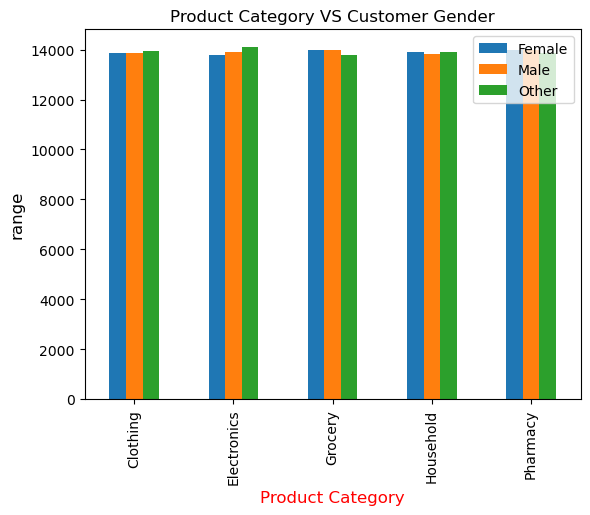

In [25]:
pd.crosstab(updated_dataset['Product_Category'],updated_dataset['Customer_Gender']).plot(kind = 'bar')
plt.title("Product Category VS Customer Gender")
plt.xlabel('Product Category', color= 'r',fontsize = 12)
plt.ylabel('range',fontsize = 12)
plt.legend()
plt.show()

### INSIGHTS
------------
#### 1.Balanced Participation Across Genders 
* For `every product category` , purchases by `Female,Male and Other` genders are `very close in numbers`.
* This suggest a `uniform distribution of product interest ` across genders.

#### 2. Top Product Categories by Gender 
* All genders seem to have a slight preference for :
     * Electronics
     * Grocery
     * These categories show marginally higher bars than others.
* This could indicate `higher demand or utility` in these areas.

#### 3. Least Variations : Pharmacy and Household 
* These two categories show `almost identical bar heights across genders` , indicating :
    * `Universal appeal/ necessity` (e.g., medicine ,household, supplies)
    * Possibly `Less influenced by demographic factors`.

#### 4. Other Gender Engagement 
* The `Other` gender category has `Comparible participation`, indicating :
    * Inclusive data collection
    * No specific product category bias or gap in reach. 

## Loyalty_Card VS Purchase_Amount
* Cat Vs Num

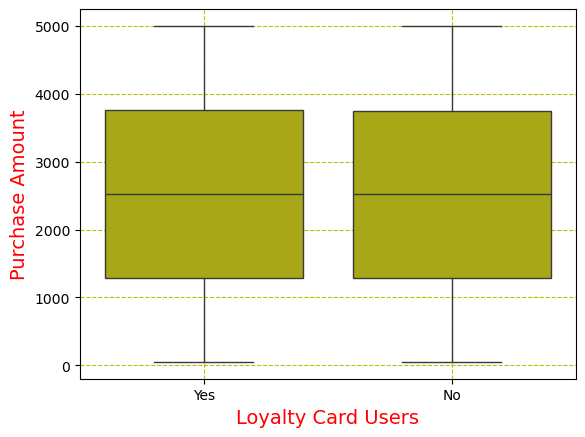

In [30]:
# Box plot
sns.boxplot(x = 'Loyalty_Card', y = 'Purchase_Amount', data = updated_dataset,color = 'y')
plt.grid(linestyle = '--',color = 'y')
plt.xlabel('Loyalty Card Users', fontsize = 14 , color = 'r')
plt.ylabel('Purchase Amount', fontsize = 14 , color = 'r')
plt.show()

## INSIGHTS
______
#### 1. Spending Patterns Are Very Similar
Both loyalty card holders and non-holders exhibit almost `identical purchasing behaviours`, with:
* Similar medians
* similar ranges
* No impactful Outliers

#### 2. Loyalty Card  ≠ Higher Spend(Yet)
* Haaving a loyalty card does `not appear to significantly increase` purchase amount per transaction.
* Suggests that either the `benefits are not strong enough`, or loyalty incentives may influence `Long - term retention`, not per- transaction value.

#### 3.Possible Opportunity :
* The data indicates `loyalty card programs aren't currently optimized spend`.
* Opportunity to `revise reward thresholds , offer tiered benefits`, or incentivize `larger baskets` for loyality users. 

## Store Type VS Region
* CAT VS CAT

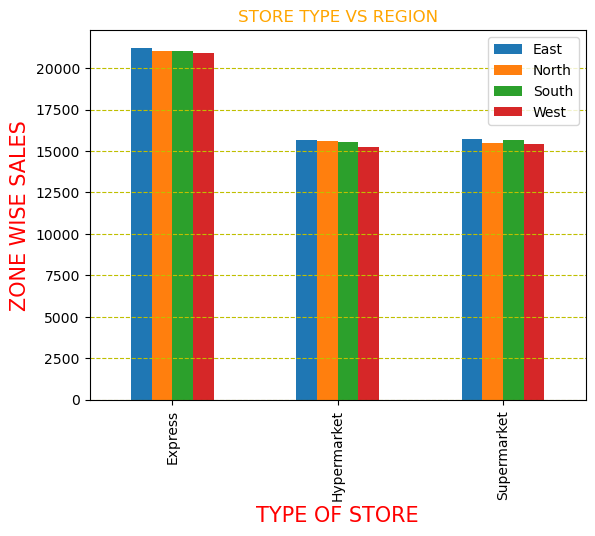

In [108]:
# crosstab 
pd.crosstab(updated_dataset['Store_Type'],updated_dataset['Region']).plot(kind = 'bar')
plt.title("STORE TYPE VS REGION",color = 'orange') 
plt.xlabel('TYPE OF STORE', color= 'r',fontsize = 15)
plt.ylabel('ZONE WISE SALES',color = 'r',  fontsize = 15)
plt.legend()
plt.grid(axis = 'y',color = 'y',ls = '--')
plt.show()

# INSIGHTS
____________
### 1. Regional Preference in Store Types
* `North Zone` : Highest sales observed in Supermarkets, indicating that customers here prefer a wide variety under one roof.
* `South Zone` : Shows a more even distribution of sales among Supermarkets, Local Shops, and Online Stores — suggesting diverse shopping behavior.
* `East Zone`: Online Stores contribute the most to sales here, possibly due to urban concentration or strong e-commerce delivery networks.
* `West Zone`: High preference for Local Shops, indicating a strong presence of traditional shopping habits or densely populated local markets.

# Summary of DMART Retail Dataset EDA
___________
The Exploratory Data Analysis (EDA) conducted on the DMART retail dataset aimed to uncover customer purchasing behavior, sales performance, and business insights. The dataset contained `214,000` transactions across 15 columns, including details like product categories, customer demographics, purchase amounts, discounts, and store types. Key steps included data cleaning (handling duplicates and missing values), outlier detection, and extensive visualization to analyze relationships between variables.

